<h1>Seaborn!!! -- Distribution Plots</h1>

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
tips = pd.read_csv('seaborn-data-master/tips.csv')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


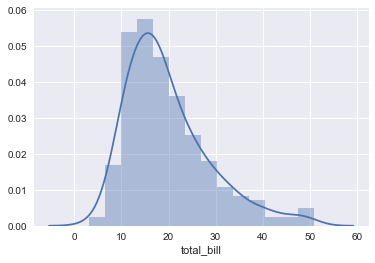

In [5]:
#distplot
sns.distplot(tips['total_bill']) #it will plot histogram and KDE karnal Density estimation

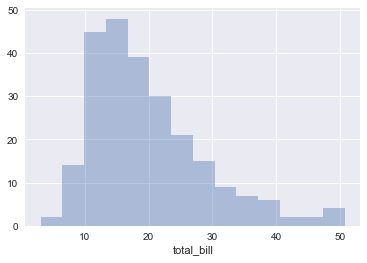

In [6]:
sns.distplot(tips['total_bill'],kde=False)

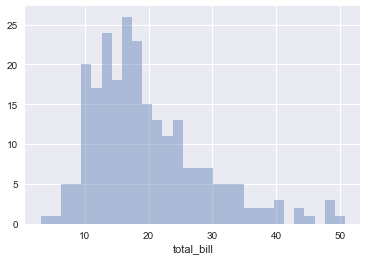

In [7]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

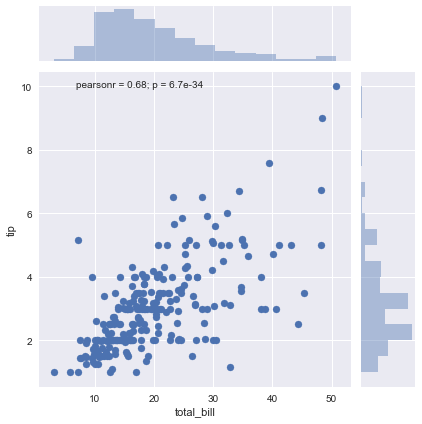

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips) #combind twi different plots by default it is having scattered as a kind of plots

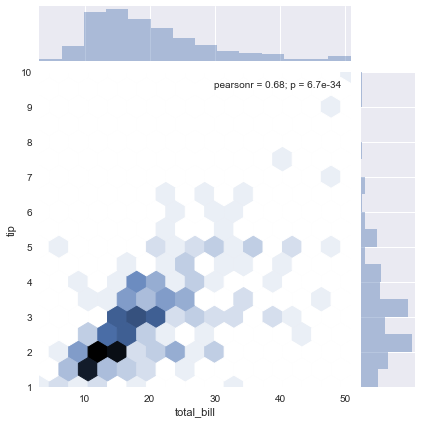

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

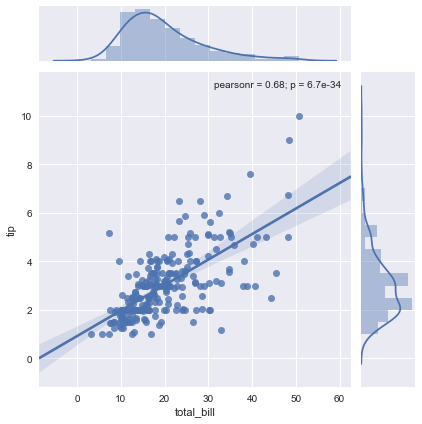

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='regression') #scaatted plot with regression line

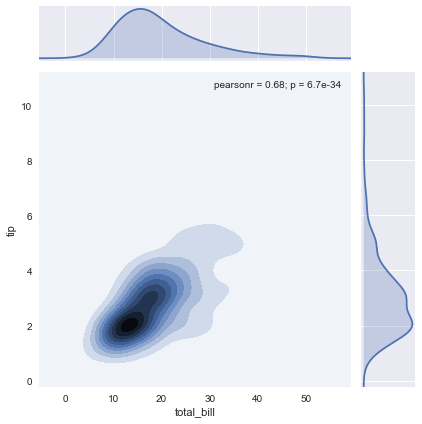

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') #kernal distribution density

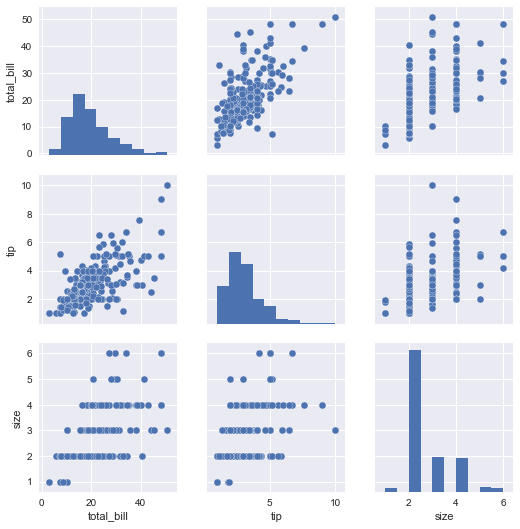

In [15]:
sns.pairplot( tips) #pair plot will do joint plot for every single possible column vs all column

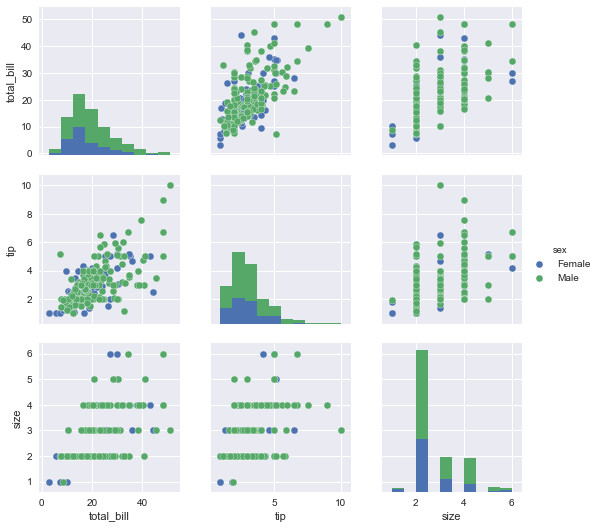

In [16]:
sns.pairplot( tips ,hue='sex') #hue  will be added to only kind of categorical columns having specific values "like sex"

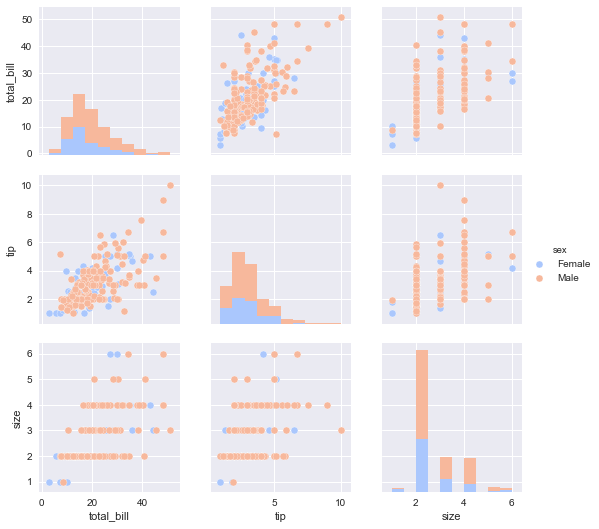

In [18]:
sns.pairplot( tips ,hue='sex',palette='coolwarm')

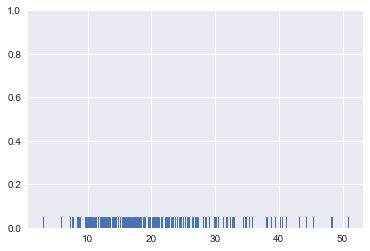

In [19]:
sns.rugplot(tips['total_bill']) #draw a dashbar dor every single point along a line

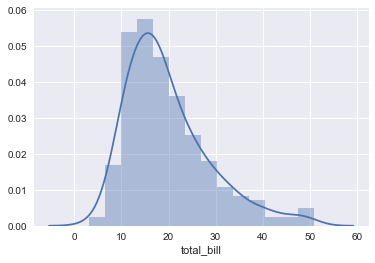

In [22]:
sns.distplot(tips['total_bill'])

(0, 1)

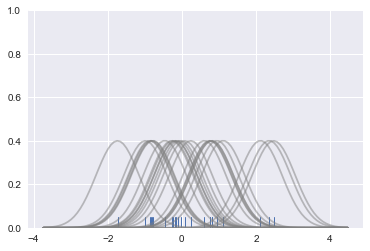

In [23]:
# Don't worry about understanding this code!
# It's just for the diagram below 
#Making of KDE plot by below to cells 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

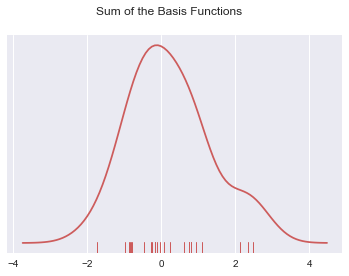

In [24]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<h1>Categorical Plots</h1>

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


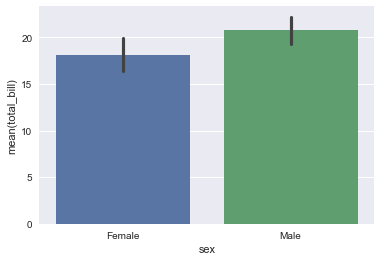

In [26]:
sns.barplot(x='sex',y='total_bill',data=tips) #by default function is mean and it will act like group by plot;

In [27]:
import numpy as np

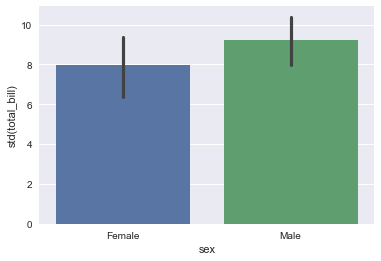

In [28]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # estimator we are change default function

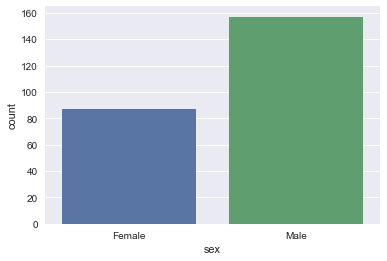

In [29]:
sns.countplot(x='sex',data=tips) #it is justlike value_counts for each type of sex

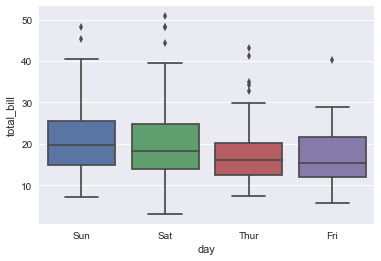

In [32]:
#BOX PLOT
sns.boxplot(x='day',y='total_bill',data=tips) 

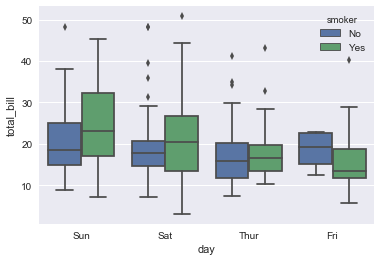

In [33]:
#we can add hue so, separate out type of people on a day like
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

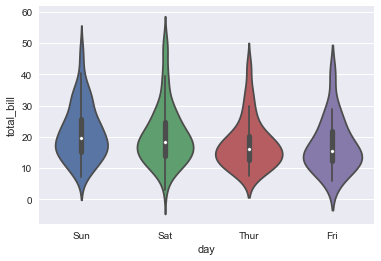

In [35]:
sns.violinplot(x='day',y='total_bill',data=tips)

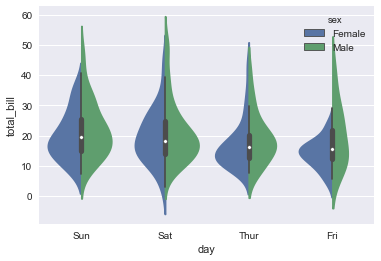

In [37]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

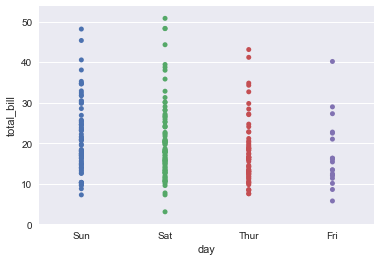

In [38]:
#StripPLOT
sns.stripplot(x='day',y='total_bill',data=tips)

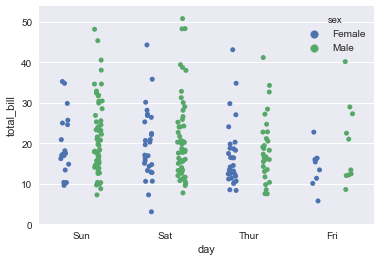

In [41]:
#StripPLOT can add jitter to better know tha plot point and hue for categorical plot
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)

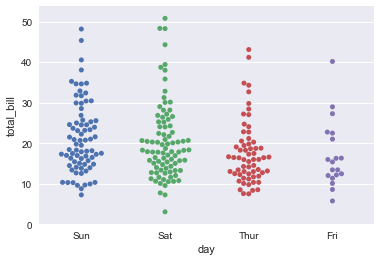

In [43]:
#Swarmplot - is essentially a combination of violent plot and Strip plot
#It shows the same distribution without actually showing all points
#Drawback do not scale well due to outliers
sns.swarmplot(x='day',y='total_bill',data=tips)

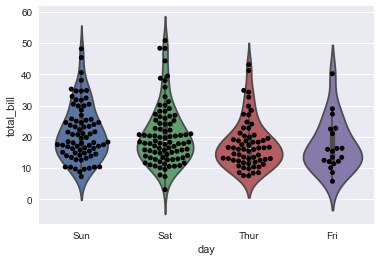

In [44]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

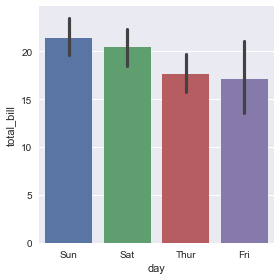

In [45]:
#FACTORPLOT
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar') #Can use kind= violent/strip/swarn etc

<h1>Matrix PLOT</h1>

In [46]:
#HeaT MAPS
flights = pd.read_csv('seaborn-data-master/flights.csv')

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [57]:
#Daa should always be in matrix form for this plot mean index and column should represent a value
#In order to get matrix form we can use pivot table or corr method
tc=tips.corr()
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


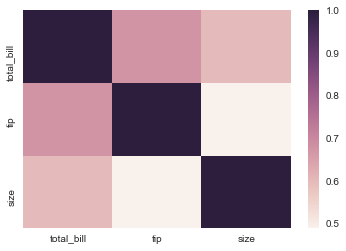

In [51]:
sns.heatmap(tc)

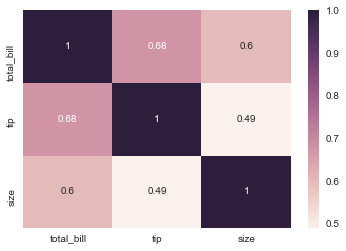

In [52]:
sns.heatmap(tc,annot=True)

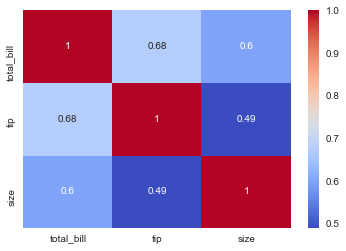

In [53]:
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [59]:
fp=flights.pivot_table(index='month',columns='year',values='passengers')

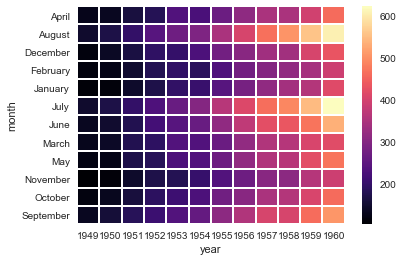

In [62]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidths=1) #cmap=coolwarm

E:\Anaconda3-4.3.1\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


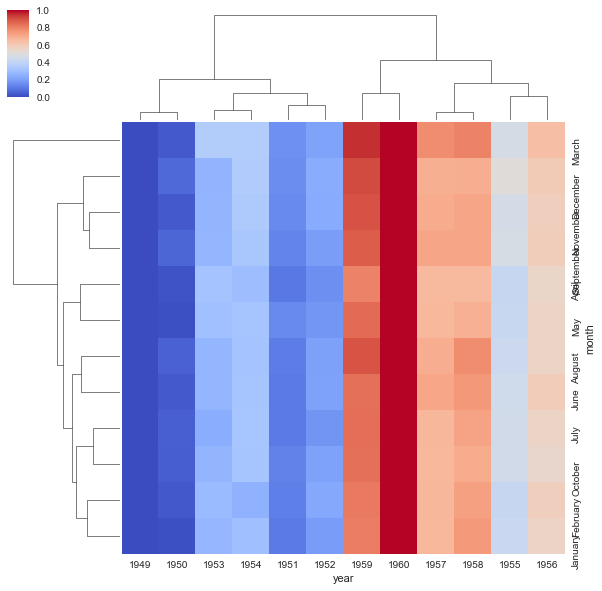

In [65]:
sns.clustermap(fp,cmap='coolwarm',standard_scale='normalize')

<h1>Grid</h1>

In [66]:
iris = pd.read_csv('seaborn-data-master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

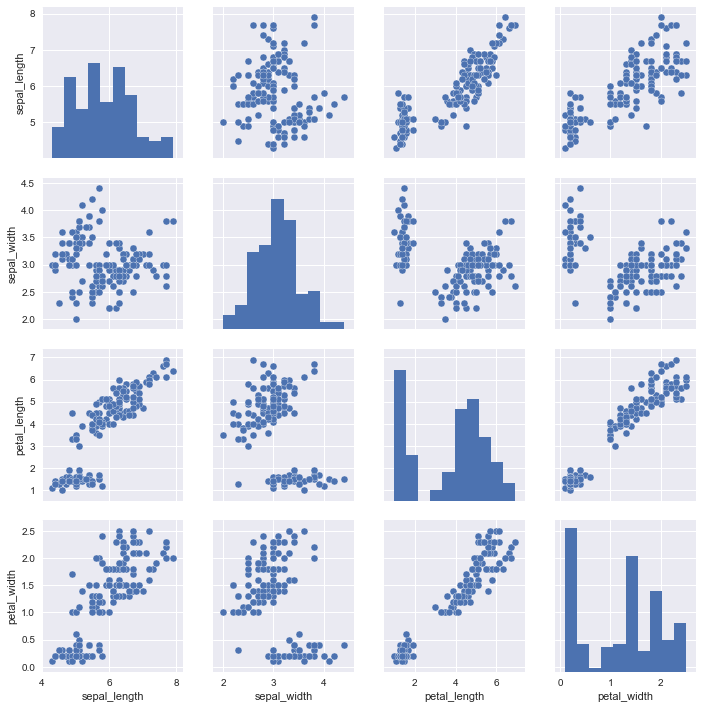

In [69]:
sns.pairplot(iris)

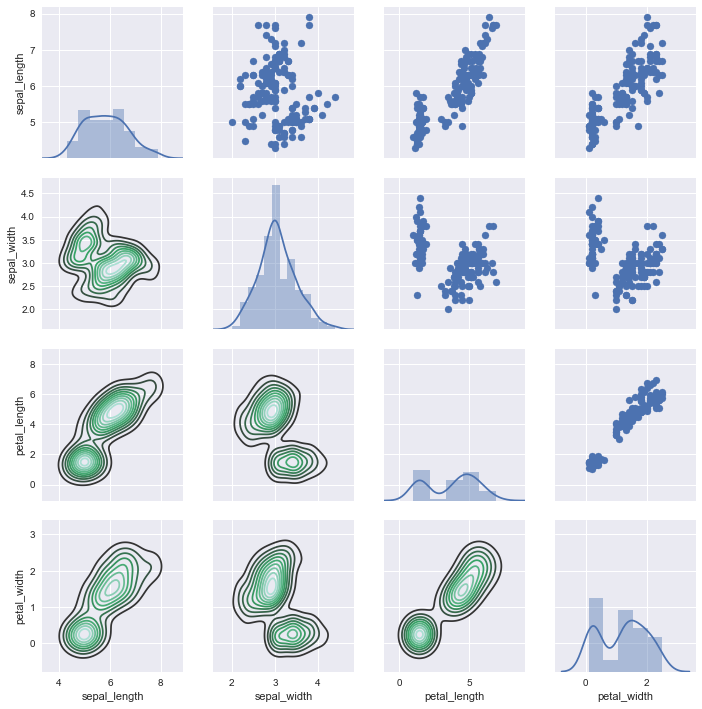

In [72]:
g = sns.PairGrid(iris)
#g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [73]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


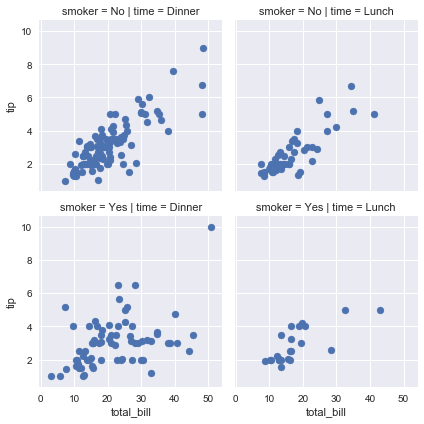

In [76]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
#g.map(sns.distplot,'total_bill')
g.map(plt.scatter,'total_bill','tip')


<h1>Regression Plot</h1>

sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100})

#it is inline calling the matplotlib params , even scatter_kws as well

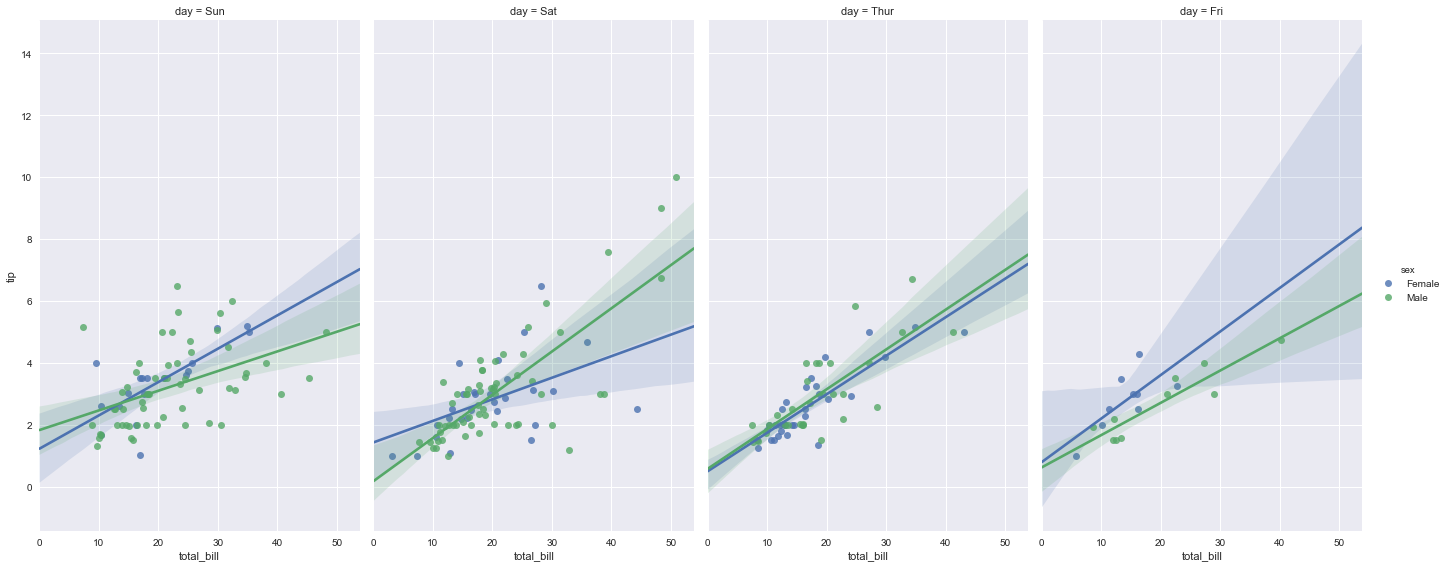

In [87]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6,size=8) #row='time'

<h1>Style and Color</h1>

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


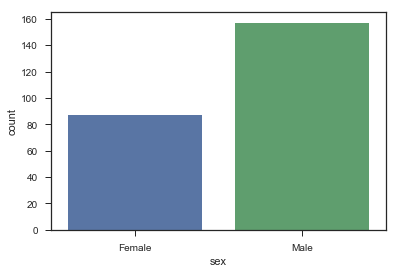

In [96]:
sns.set_style('ticks') #whitegrid,ticks,white etcs
sns.countplot(x='sex',data=tips)
#sns.despine(left=True,bottom=True)

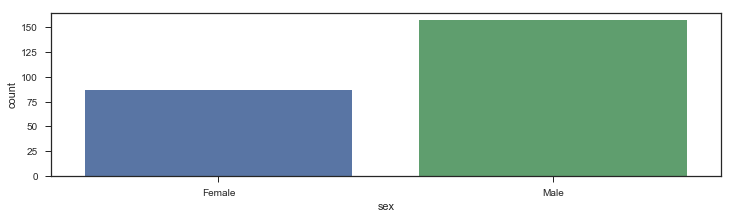

In [97]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

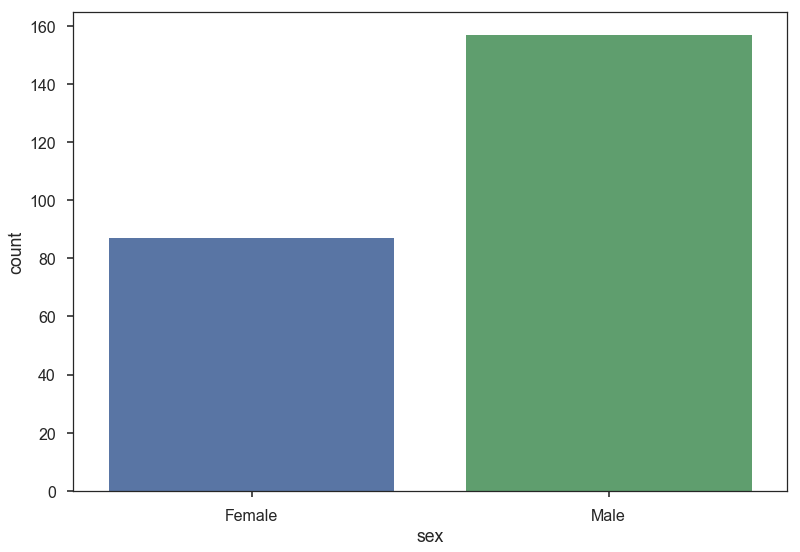

In [107]:
sns.set_context('poster')#,font_scale=3) # context determine is what sort of purpose you are using plot for
sns.countplot(x='sex',data=tips)

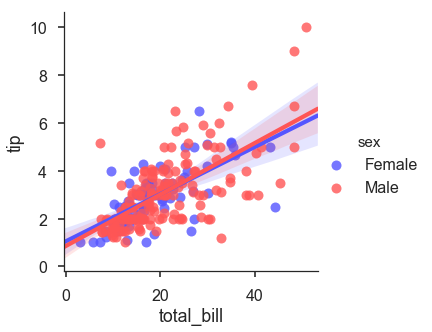

In [115]:
#Palatte and colors
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic',scatter_kws={'s':100})